In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [8]:
train_data=x_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1136,-121.71,39.71,17.0,2748.0,556.0,1174.0,514.0,3.0660,INLAND,102600.0
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,114100.0
2452,-119.56,36.51,9.0,3860.0,809.0,2157.0,770.0,2.5033,INLAND,70100.0
13954,-117.10,34.21,22.0,4397.0,931.0,1145.0,445.0,4.5268,INLAND,108400.0
14782,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,NEAR OCEAN,138900.0
...,...,...,...,...,...,...,...,...,...,...
9355,-122.64,37.96,29.0,377.0,58.0,151.0,67.0,9.5551,NEAR OCEAN,500001.0
20300,-119.19,34.15,31.0,4175.0,1004.0,3310.0,954.0,3.1989,NEAR OCEAN,185400.0
6668,-118.12,34.17,52.0,2166.0,483.0,1308.0,467.0,3.0417,INLAND,222600.0
10354,-117.62,33.77,43.0,1911.0,439.0,930.0,433.0,4.6369,<1H OCEAN,186400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

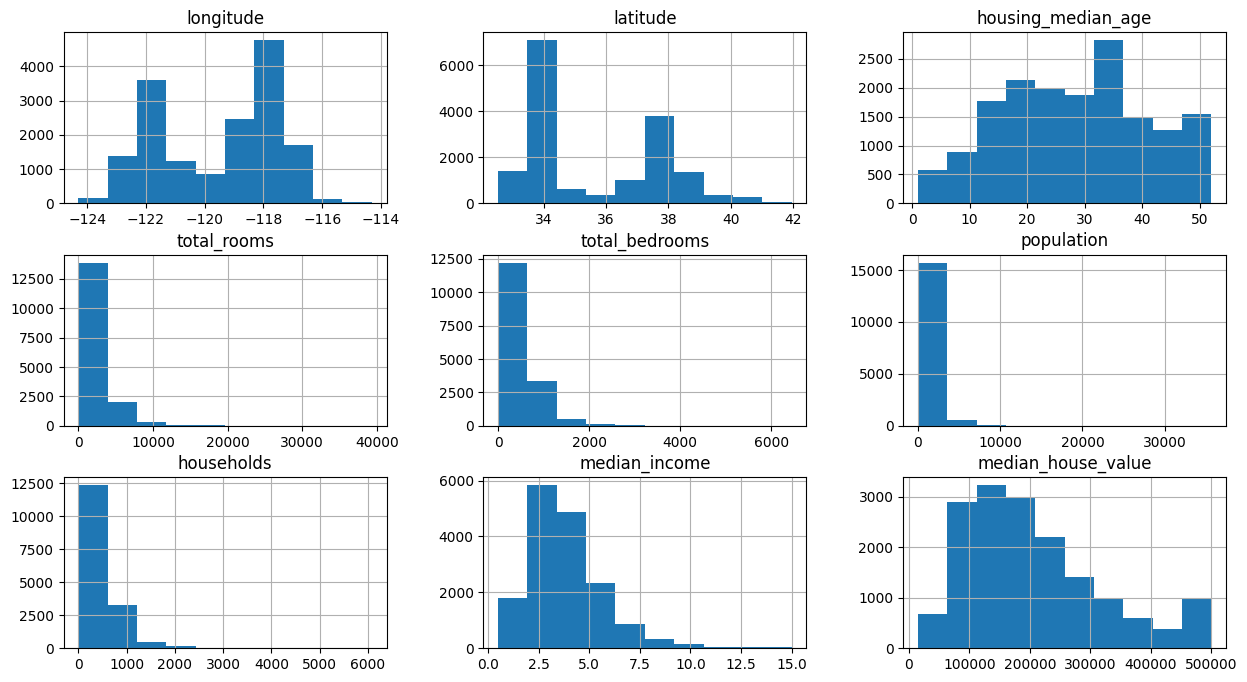

In [10]:
train_data.hist(figsize=(15, 8))

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


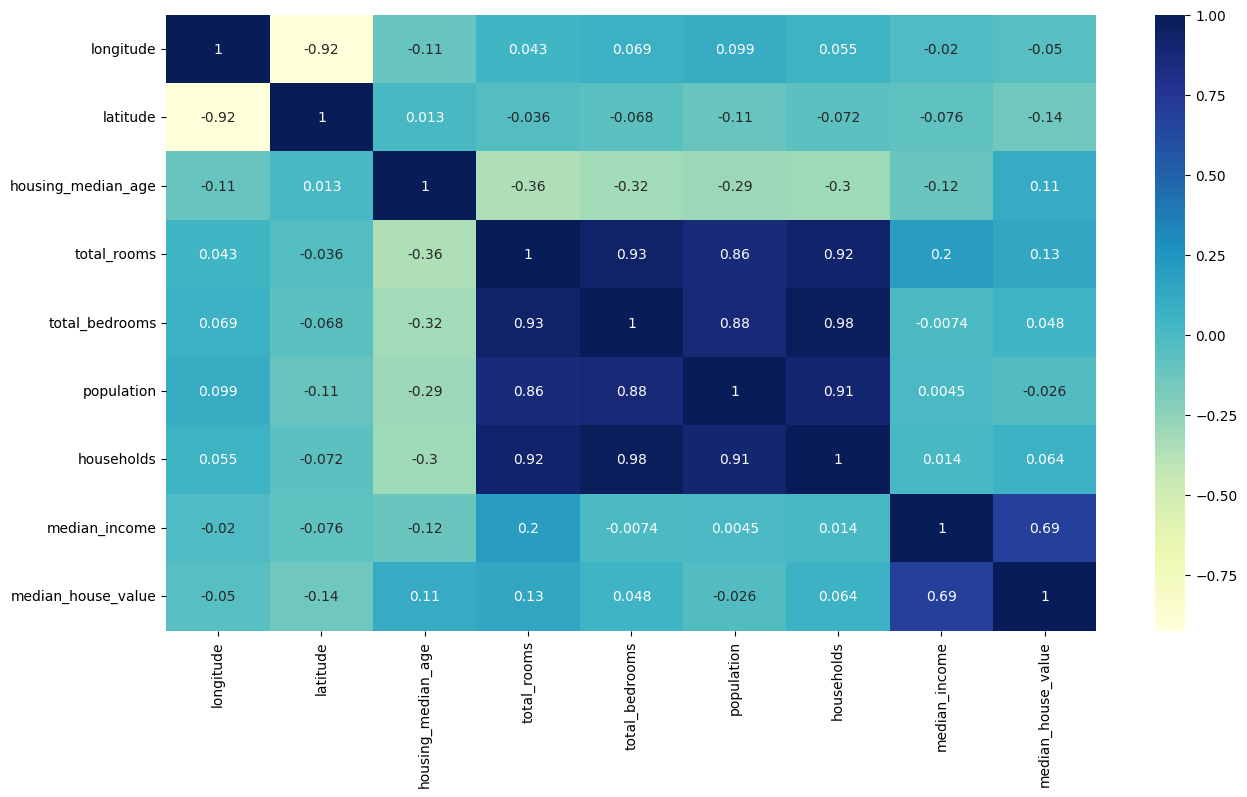

In [11]:
# Exclude non-numeric 'ocean_proximity' column
numeric_data = train_data.select_dtypes(include=[np.number])

# Check if the selection was correct
print(numeric_data.dtypes)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

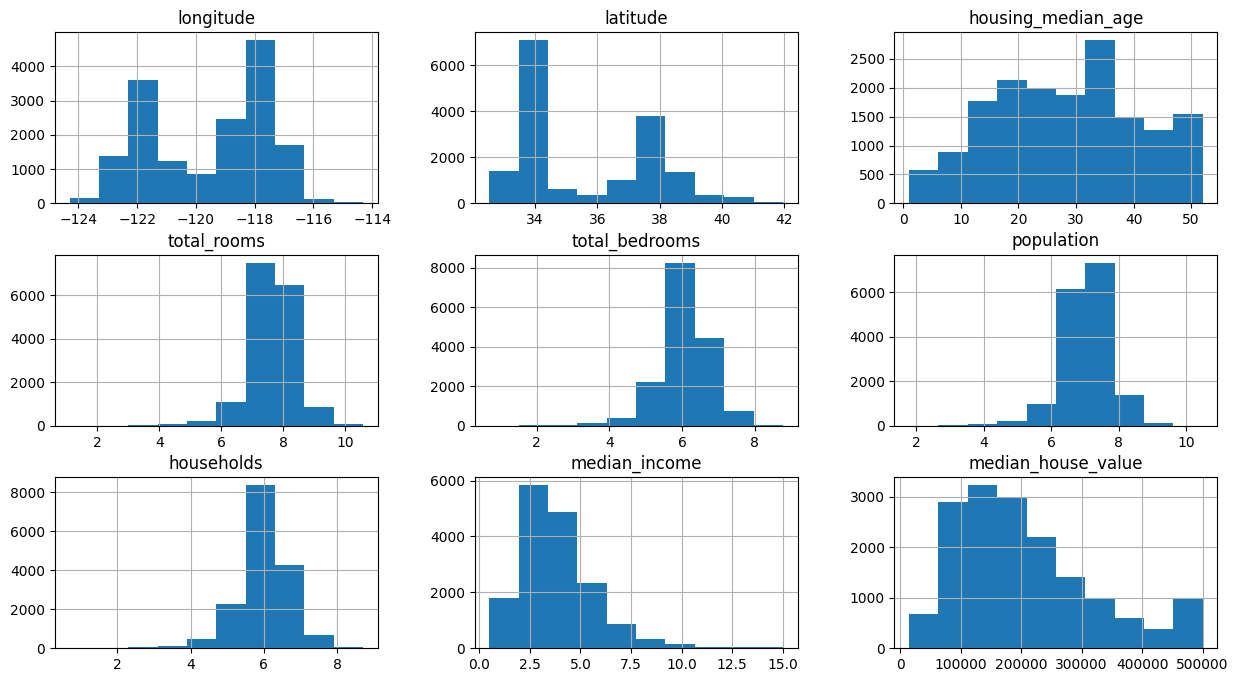

In [13]:
train_data.hist(figsize=(15, 8))


In [14]:
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'] , axis =1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1136,-121.71,39.71,17.0,7.918992,6.322565,7.069023,6.244167,3.0660,102600.0,False,True,False,False,False
12754,-121.37,38.61,39.0,6.714171,4.990433,5.799093,4.976734,3.0833,114100.0,False,True,False,False,False
2452,-119.56,36.51,9.0,8.258681,6.697034,7.676937,6.647688,2.5033,70100.0,False,True,False,False,False
13954,-117.10,34.21,22.0,8.388905,6.837333,7.044033,6.100319,4.5268,108400.0,False,True,False,False,False
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,138900.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-122.64,37.96,29.0,5.934894,4.077537,5.023881,4.219508,9.5551,500001.0,False,False,False,False,True
20300,-119.19,34.15,31.0,8.337109,6.912743,8.105006,6.861711,3.1989,185400.0,False,False,False,False,True
6668,-118.12,34.17,52.0,7.681099,6.182085,7.177019,6.148468,3.0417,222600.0,False,True,False,False,False
10354,-117.62,33.77,43.0,7.555905,6.086775,6.836259,6.073045,4.6369,186400.0,True,False,False,False,False


<Axes: >

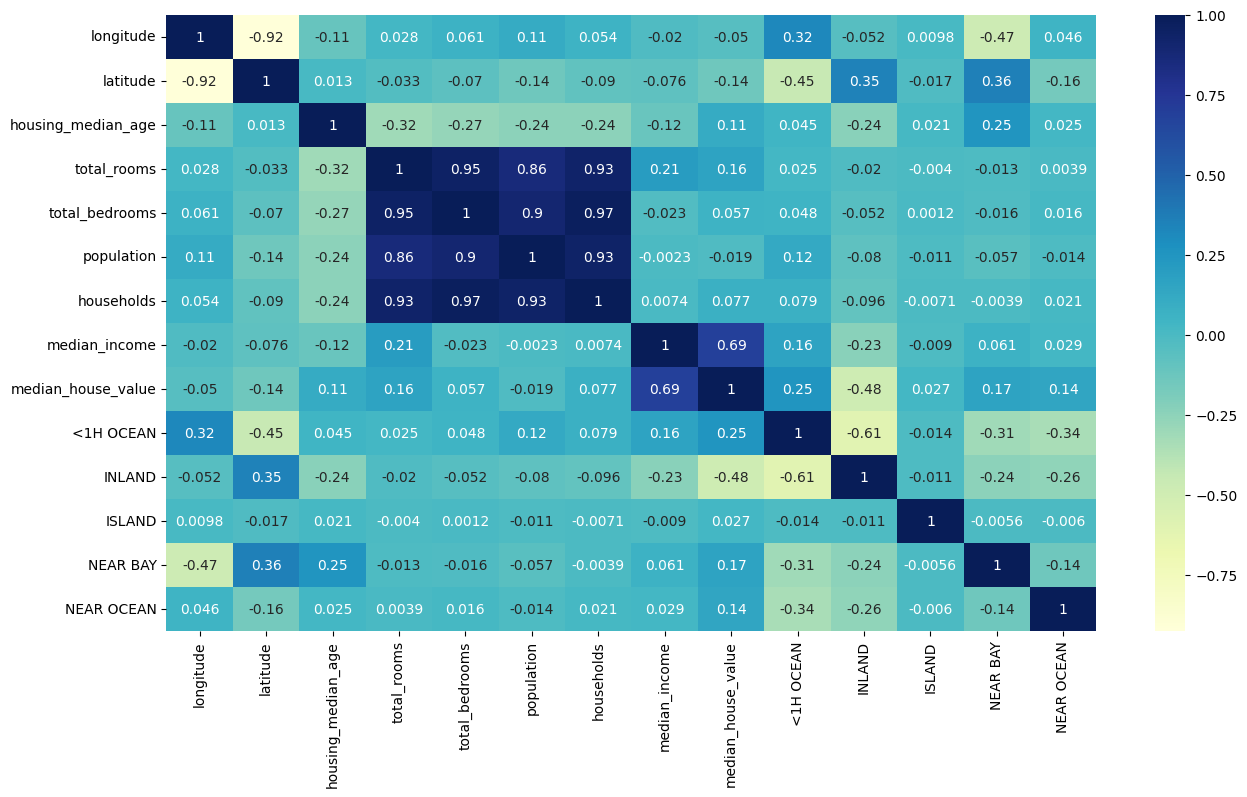

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot= True , cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

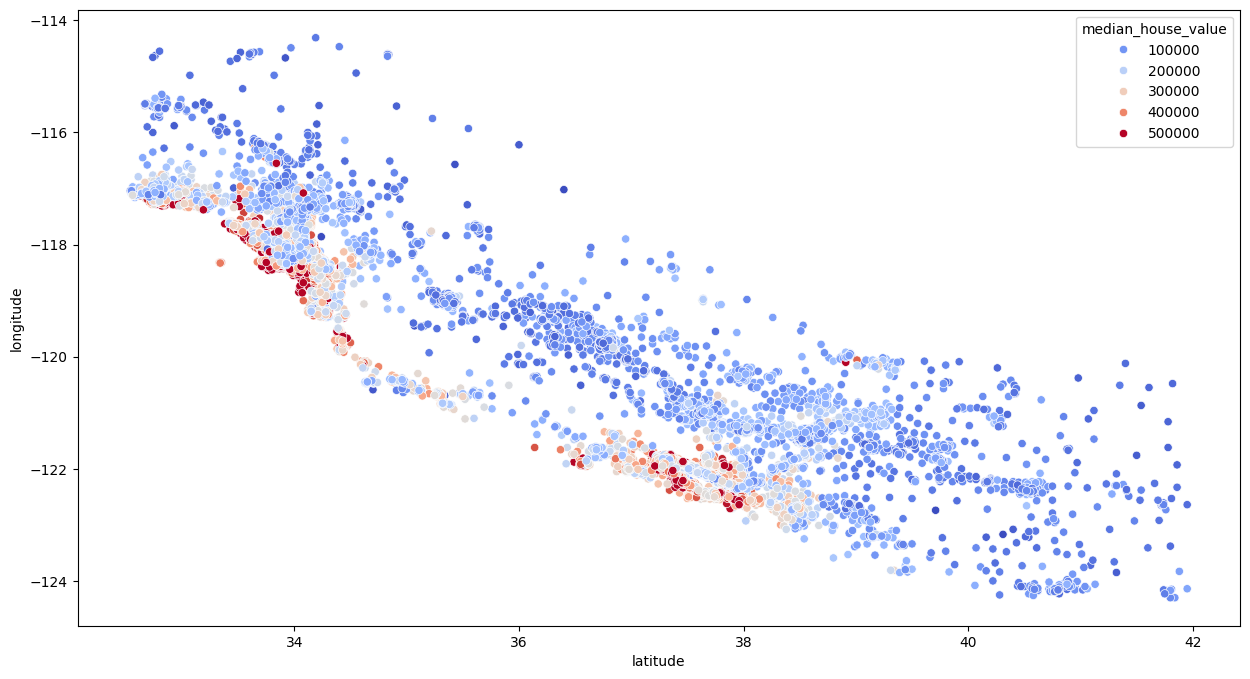

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data , hue ="median_house_value" , palette="coolwarm")

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

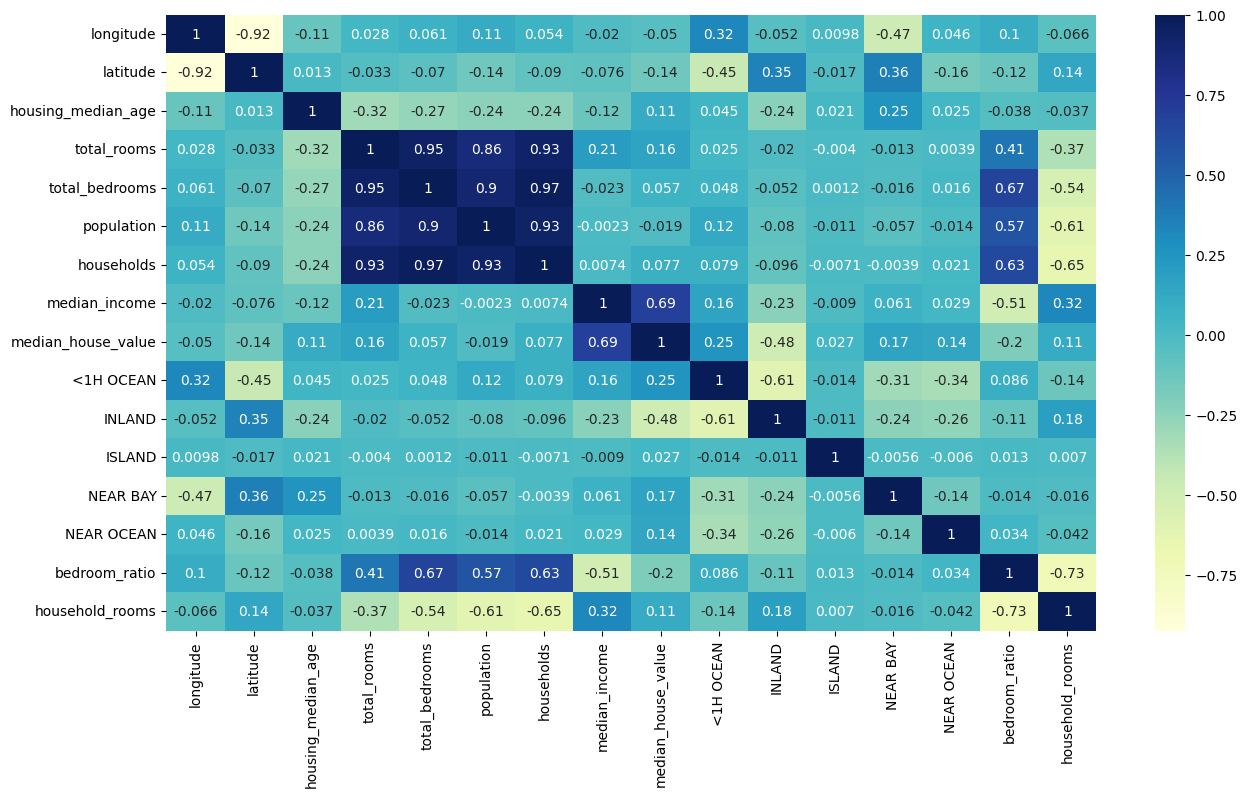

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot= True , cmap='YlGnBu')

In [20]:

scaler = StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [21]:
test_data=x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis =1)


test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']

In [22]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19440,-121.00,37.68,29.0,7.976595,6.100319,7.065613,6.133398,4.9904,158100.0,False,True,False,False,False,0.764777,1.300518
5105,-118.31,33.95,44.0,7.351800,5.811141,6.999422,5.758902,4.0043,133500.0,True,False,False,False,False,0.790438,1.276598
5791,-118.23,34.14,33.0,7.960673,6.762730,7.631432,6.673298,2.6268,201300.0,True,False,False,False,False,0.849517,1.192914
18141,-122.05,37.34,34.0,7.830426,5.996452,6.984716,5.991465,7.7865,423900.0,True,False,False,False,False,0.765789,1.306930
7696,-118.12,33.95,35.0,7.380879,5.638355,6.688355,5.638355,5.7520,291000.0,True,False,False,False,False,0.763914,1.309048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,-121.27,38.67,15.0,7.439559,5.849325,6.584791,5.866468,3.8906,128700.0,False,True,False,False,False,0.786246,1.268150
16346,-121.34,38.03,12.0,7.903966,6.073045,7.090910,5.942799,4.9861,133500.0,False,True,False,False,False,0.768354,1.330007
10242,-117.87,33.89,25.0,7.041412,5.093750,6.188264,5.017280,7.1472,270100.0,True,False,False,False,False,0.723399,1.403432
13908,-116.40,34.09,9.0,8.487970,6.771936,7.649216,6.641182,3.2723,97800.0,False,True,False,False,False,0.797827,1.278081


In [23]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [24]:
x_test_s=scaler.fit_transform(x_test)


In [25]:
reg.score(x_test , y_test)

0.6796600270775857

In [26]:

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [27]:
forest.score(x_test_s, y_test)

0.7900147673558083

In [28]:


# Définir le modèle
forest = RandomForestRegressor()

# Définir les paramètres pour la recherche sur les hyperparamètres
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
    "min_samples_split": [2, 5, 10]  # Assurez-vous que ce paramètre est correct
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Entraîner le modèle
grid_search.fit(x_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)


Meilleurs paramètres :  {'max_features': 8, 'min_samples_split': 5, 'n_estimators': 30}


In [30]:

# Afficher le meilleur estimateur
best_forest = grid_search.best_estimator_
print("Meilleur estimateur : ", best_forest)


Meilleur estimateur :  RandomForestRegressor(max_features=8, min_samples_split=5, n_estimators=30)


In [31]:

# Évaluer le modèle sur les données de test
test_score = best_forest.score(x_test_s, y_test)
print("Score du modèle sur les données de test : ", test_score)

Score du modèle sur les données de test :  0.7921122820709751
